# Second Part of the Bachelor's Thesis Project Work

Previously we worked on implementing and improving the mathematical formulation of the 2E-VRP problem with collaboration nodes. In this part, we will focus on finding collaboration nodes in the network to benchmark the solution with widely available datasets and constructing a heurististic algorithm to solve the problem.

## Finding the Collaboration Nodes

In [1]:
import pandas as pd
import numpy as np

# suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Load the data
instance_name = 'A1'
instance = pd.read_excel('Data\Instances\Small_Instances.xlsx', sheet_name=instance_name)

instance

,Number,X,Y,demand,lsp,designation
0,1,47.416821,53.807242,0,1.0,d
1,2,13.439768,8.259892,0,2.0,d
2,3,35.115685,44.278523,0,1.0,s
3,4,17.539752,23.700627,0,2.0,s
4,5,37.094541,19.816419,0,1.0,s
5,6,18.165620,44.401467,0,2.0,s
6,7,21.094196,35.757118,10,2.0,c
7,8,12.744331,39.193129,10,1.0,c
8,9,18.017488,27.315854,10,2.0,c
9,10,29.220487,39.021037,10,1.0,c


Plotting the second echelon nodes

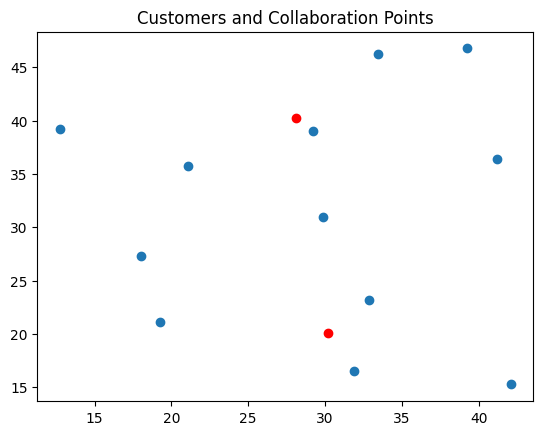

In [2]:
import matplotlib.pyplot as plt

customers = instance[instance['designation'] == 'c']
collab_points = instance[instance['designation'] == 'z']

plt.scatter(customers['X'], customers['Y'])
plt.scatter(collab_points['X'], collab_points['Y'], color='red')
plt.title('Customers and Collaboration Points');

Finding elbow point for optimal number of clusters (collaboration nodes)

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Data preparation and clustering
cost = []
for i in range(1, 11):
    KM = KMeans(n_clusters=i, max_iter=500, random_state=42)
    KM.fit(customers[['X', 'Y']])  # fit the data
    cost.append(KM.inertia_)  # calculate squared error for the clustered points

# plot the cost against K values
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), cost, color='green', linewidth=2, marker='o', markersize=8, label='Squared Error (Cost)')
plt.title(f"Elbow Method for Optimal K {instance_name}", fontsize=14, fontweight='bold')
plt.xlabel("Number of Clusters (K)", fontsize=12)
plt.ylabel("Cost (Inertia)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.axvline(x=3, color='red', linestyle='--', label='Optimal K (Elbow Point)')
plt.legend(fontsize=10)
# not showing the plot 
plt.close();

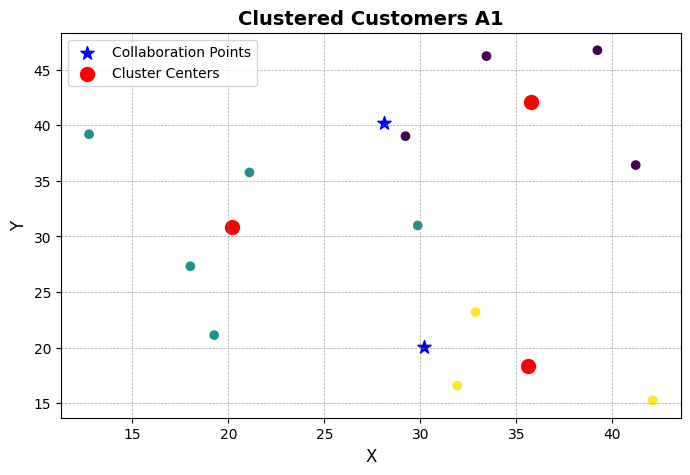

In [8]:
# Fit KMeans and plot the clusters
KM = KMeans(n_clusters=3, max_iter=500, random_state=42)
KM.fit(customers[['X', 'Y']])
customers['cluster'] = KM.labels_

plt.figure(figsize=(8, 5))
plt.scatter(customers['X'], customers['Y'], c=customers['cluster'], cmap='viridis')
plt.scatter(collab_points['X'], collab_points['Y'], marker='*', color='blue', label='Collaboration Points', s = 100)
plt.scatter(KM.cluster_centers_[:, 0], KM.cluster_centers_[:, 1], color='red', s=100, label='Cluster Centers')
plt.title(f'Clustered Customers {instance_name}', fontsize=14, fontweight='bold')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

In [10]:
# cluster centre coordinates
KM.cluster_centers_

array([[35.77024717, 42.10275775],
       [20.19488175, 30.87438822],
       [35.62578004, 18.34131261]])

In [12]:
data = instance.set_index('Number')[['X', 'Y']]

In [16]:
data.loc[19] = KM.cluster_centers_[0]
data.loc[20] = KM.cluster_centers_[1]
data.loc[21] = KM.cluster_centers_[2]

In [17]:
data

,X,Y
Number,,
1,47.416821,53.807242
2,13.439768,8.259892
3,35.115685,44.278523
4,17.539752,23.700627
5,37.094541,19.816419
6,18.165620,44.401467
7,21.094196,35.757118
8,12.744331,39.193129
9,18.017488,27.315854


In [18]:
instance = 'A4'

data = pd.read_excel("Data\Instances\Small_Instances.xlsx", sheet_name=instance, index_col=0)
customers = data[data['designation'] == 'c']
KM = KMeans(n_clusters=3, max_iter=500, random_state=42)
KM.fit(customers[['X', 'Y']])

data = data[['X', 'Y']]
data.loc[19] = KM.cluster_centers_[0]
data.loc[20] = KM.cluster_centers_[1]
data.loc[21] = KM.cluster_centers_[2]
data

,X,Y
Number,,
1,33.440441,55.379126
2,44.304852,4.873916
3,38.499709,35.612590
4,17.389325,24.302935
5,21.607041,47.963727
6,29.429044,13.914978
7,47.136864,22.847530
8,32.401927,41.973039
9,42.190444,26.591139
